In [76]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 

<img src=normal.png width=300>

In [31]:
sp.norm(0, 1).pdf(0.4  )

0.36827014030332333

(180, 187, 3)
9
255
19
9.0
255.0
19.0
0.3520653267642995


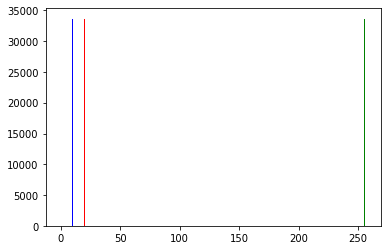

In [34]:
train = cv2.imread("patch3.png")    
print(train.shape)
b,g,r = cv2.split(train)
hb = plt.hist(b.ravel(), 256, [0,256], color='b') 
hg = plt.hist(g.ravel(), 256, [0,256], color='g') 
hr = plt.hist(r.ravel(), 256, [0,256], color='r') 
maxb = (np.where( hb[0] == np.max(hb[0])) )[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])) )[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])) )[0][0]
print(maxb)
print(maxg)
print(maxr)

print(np.mean(b) )
print(np.mean(g) )
print(np.mean(r) )

t = 7
p= sp.norm(0,1).pdf(  (9 - 7)/4  )
print(p)

In [31]:
prob = sp.norm(maxg, 6).pdf(252) 
print(prob)

0.05867755446071659


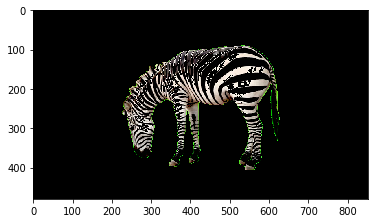

In [42]:
test = cv2.imread("zoo.jpg")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/5)
        prob += norm.pdf((test[r,c,1]-maxg)/6)
        prob += norm.pdf((test[r,c,2]-maxr)/6)        
        if prob > 0.2 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

(512, 512)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.int32'>


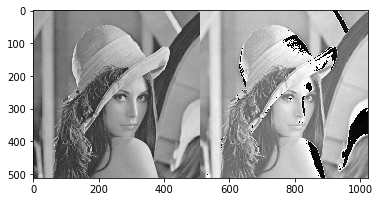

In [18]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
print(type(img))
print(type(img[0,0]))
imgint = np.array(img, dtype='int')
print(type(imgint[0,0]))
img2 = img + 50

a = np.array([1,2,3])
plt.imshow( np.hstack([img, img2]), cmap="gray")

In [72]:
a = np.array([256, 254], dtype="uint8")
b = a + 10
print(b)
a = np.array([300,20, 254], dtype="int")
b = a + 10
print(b)
c = np.clip(b, 0, 255)
print(c)
d = np.array(c, dtype="uint8")
print(d)

e = [1, 1.0, 2]
f = np.array(e)
print(type(e[0]))
print(type(e[1]))
print(type(f[0]))
print(type(f[1]))



[4 8]
[260  30 264]
[255  30 255]
[255  30 255]
<class 'int'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>


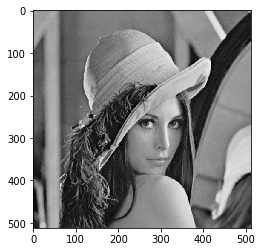

In [83]:
#img2 = np.array(img, dtype="int")
img2 = img.astype(np.float32)
img2 *= 0.2
img2 = np.clip(img2, 0, 255).astype(np.uint8)

plt.imshow(img2, cmap="gray")

In [16]:
lut = [x+5 for x in range(10)]
print(lut)

lut2 = [x+5 if x+5 <=9 else 9 for x in range(10)]
print(lut2)

def addlut(op) :
    return [x+op if x+op <255 else 255 for x in range(256)]


print(mullut(1.5))


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]
[0.0, 1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0, 16.5, 18.0, 19.5, 21.0, 22.5, 24.0, 25.5, 27.0, 28.5, 30.0, 31.5, 33.0, 34.5, 36.0, 37.5, 39.0, 40.5, 42.0, 43.5, 45.0, 46.5, 48.0, 49.5, 51.0, 52.5, 54.0, 55.5, 57.0, 58.5, 60.0, 61.5, 63.0, 64.5, 66.0, 67.5, 69.0, 70.5, 72.0, 73.5, 75.0, 76.5, 78.0, 79.5, 81.0, 82.5, 84.0, 85.5, 87.0, 88.5, 90.0, 91.5, 93.0, 94.5, 96.0, 97.5, 99.0, 100.5, 102.0, 103.5, 105.0, 106.5, 108.0, 109.5, 111.0, 112.5, 114.0, 115.5, 117.0, 118.5, 120.0, 121.5, 123.0, 124.5, 126.0, 127.5, 129.0, 130.5, 132.0, 133.5, 135.0, 136.5, 138.0, 139.5, 141.0, 142.5, 144.0, 145.5, 147.0, 148.5, 150.0, 151.5, 153.0, 154.5, 156.0, 157.5, 159.0, 160.5, 162.0, 163.5, 165.0, 166.5, 168.0, 169.5, 171.0, 172.5, 174.0, 175.5, 177.0, 178.5, 180.0, 181.5, 183.0, 184.5, 186.0, 187.5, 189.0, 190.5, 192.0, 193.5, 195.0, 196.5, 198.0, 199.5, 201.0, 202.5, 204.0, 205.5, 207.0, 208.5, 210.0, 211.5, 213.0, 214.5

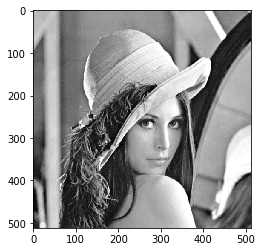

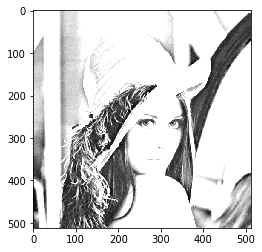

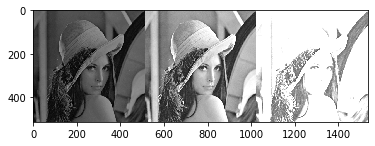

In [25]:
def  mullut(op) :
    return np.array([x*op if x*op <255 else 255 
                     for x in range(256)]).astype("uint8")
src2 = cv2.LUT(img, mullut(1.2))
#print(src2)
plt.imshow(src2, cmap="gray")
plt.show()
src2 = cv2.LUT(img, mullut(2.0))
#print(src2)
plt.imshow(src2, cmap="gray")
plt.show()

all = np.hstack([
        cv2.LUT(img, mullut(0.7)), 
        cv2.LUT(img, mullut(1.2)),
        cv2.LUT(img, mullut(2.5))])
plt.imshow(all, cmap="gray")        


[[219 219 218 ... 225 212 188]
 [219 219 218 ... 225 212 188]
 [219 219 218 ... 225 212 188]
 ...
 [103 103 109 ... 165 162 164]
 [103 103 114 ... 167 168 172]
 [103 103 114 ... 167 168 172]]


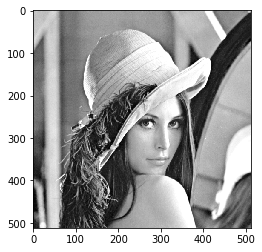

In [120]:
add = 50
nullut = np.array([x+add if x+add <= 255 else 255 for x in range(256) ]).astype(np.uint8)
src2 = cv2.LUT(img, nullut)
print(src2)
plt.imshow(src2, cmap="gray")


In [53]:

def posterlut(l) :
    return np.array([ int(x/l)*l  for x in range(256) ]).astype("uint8")

def binarylut(t) :
    return np.array([ 255 if x > t else 0 for x in range(256) ]  ).astype("uint8")

def binarylut(t) :
    return np.array([ (x > t)*255 for x in range(256) ]  ).astype("uint8")


p =posterlut(10)
print(p)


[  0   0   0   0   0   0   0   0   0   0  10  10  10  10  10  10  10  10
  10  10  20  20  20  20  20  20  20  20  20  20  30  30  30  30  30  30
  30  30  30  30  40  40  40  40  40  40  40  40  40  40  50  50  50  50
  50  50  50  50  50  50  60  60  60  60  60  60  60  60  60  60  70  70
  70  70  70  70  70  70  70  70  80  80  80  80  80  80  80  80  80  80
  90  90  90  90  90  90  90  90  90  90 100 100 100 100 100 100 100 100
 100 100 110 110 110 110 110 110 110 110 110 110 120 120 120 120 120 120
 120 120 120 120 130 130 130 130 130 130 130 130 130 130 140 140 140 140
 140 140 140 140 140 140 150 150 150 150 150 150 150 150 150 150 160 160
 160 160 160 160 160 160 160 160 170 170 170 170 170 170 170 170 170 170
 180 180 180 180 180 180 180 180 180 180 190 190 190 190 190 190 190 190
 190 190 200 200 200 200 200 200 200 200 200 200 210 210 210 210 210 210
 210 210 210 210 220 220 220 220 220 220 220 220 220 220 230 230 230 230
 230 230 230 230 230 230 240 240 240 240 240 240 24

[[[184 192 241]
  [184 192 241]
  [189 192 239]
  ...
  [182 199 243]
  [174 187 238]
  [158 165 228]]

 [[184 192 241]
  [184 192 241]
  [189 192 239]
  ...
  [182 199 243]
  [174 187 238]
  [158 165 228]]

 [[184 192 241]
  [184 192 241]
  [189 192 239]
  ...
  [182 199 243]
  [174 187 238]
  [158 165 228]]

 ...

 [[132  76 153]
  [132  76 153]
  [130  91 160]
  ...
  [153 144 213]
  [147 139 213]
  [149 134 216]]

 [[129  83 152]
  [129  83 152]
  [134  99 163]
  ...
  [149 141 217]
  [151 142 218]
  [151 145 220]]

 [[129  83 152]
  [129  83 152]
  [134  99 163]
  ...
  [149 141 217]
  [151 142 218]
  [151 145 220]]]


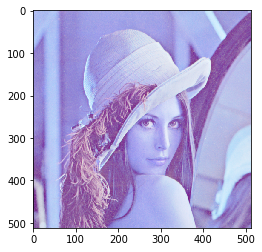

In [54]:
def inverselut() :
    return np.array([255-x for x in range(256) ]).astype("uint8")

def gammalut(gamma) :
    invGamma = 1.0 / gamma
    return np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

src2 = cv2.LUT(img, gammalut(2.2) )
print(src2)
plt.imshow(src2, cmap="gray")

(512, 512)
(512, 512, 3)


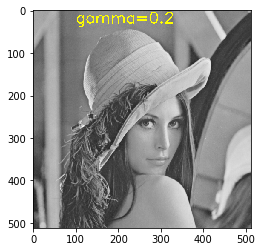

In [51]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(col.shape)

cv2.putText(col, "gamma=0.2", (100, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)

plt.imshow(col)

In [69]:
img = cv2.imread("gamma.jpg")
col = cv2.LUT(img, gammalut(0.5))
cv2.putText(col, "gamma=0.5", (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g1.jpg", col)


col = cv2.LUT(img, gammalut(1.5))
cv2.putText(col, "gamma=1.5", (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g2.jpg", col)

col = cv2.LUT(img, gammalut(2.5))
cv2.putText(col, "gamma=2.5", (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g3.jpg", col)

gm = [0.5, 1.2, 2.5, 3.0]
for i in range(len(gm)) :
    col = cv2.LUT(img, gammalut(gm[i]))
    cv2.putText(col, f"gamma={gm[i]}", (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
    cv2.imwrite(f"g{i+1}.jpg", np.hstack([img, col]))
    

In [77]:
from PIL import Image
im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

im1.save("out3.gif", save_all=True, append_images=[im2, im3, im4],
         duration=500, loop=0)

<h1>Hello</h1>
<img src=out3.gif?3443>
